In [1]:
import categories

In [2]:
categories

<module 'categories' from '/Users/alexanderhsu/Documents/GitHub/semi-supervised-ASL/categories.py'>

In [3]:
categories.VIDEO_UPLOAD

'Video Upload'

In [4]:
categories.APPLICATION_CATEGORIES_BY_COLUMN

{0: ['Video Upload'], 1: ['Sign Training'], 2: ['Predict']}

In [5]:
categories.APPLICATION_CATEGORIES_BY_COLUMN[0]

['Video Upload']

In [8]:
import streamlit as st
import cv2
@st.cache(allow_output_mutation=True)
def get_cap(location):
    print("Loading in function", str(location))
    video_stream = cv2.VideoCapture(str(location))
    total = int(video_stream.get(cv2.CAP_PROP_FRAME_COUNT))
    # Check if camera opened successfully
    if video_stream.isOpened() == False:
        print("Error opening video  file")
    return video_stream, total

In [9]:
video_stream = cv2.VideoCapture('../temp_video_0.mp4')
video_stream

< cv2.VideoCapture 0x15280b310>

In [10]:
video_stream.get(cv2.CAP_PROP_FRAME_COUNT)

3403.0

In [24]:
ret, image = video_stream.read()
ret

True

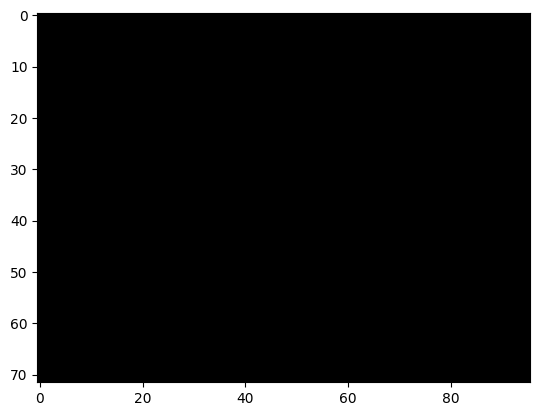

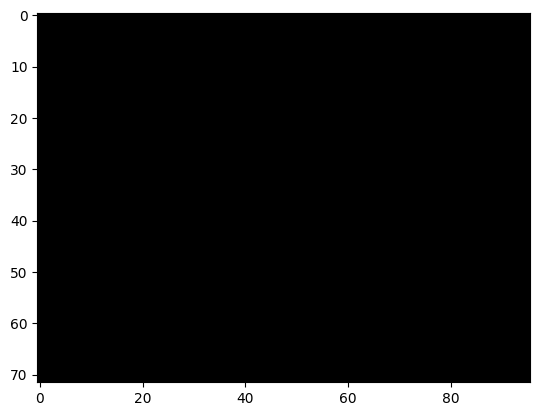

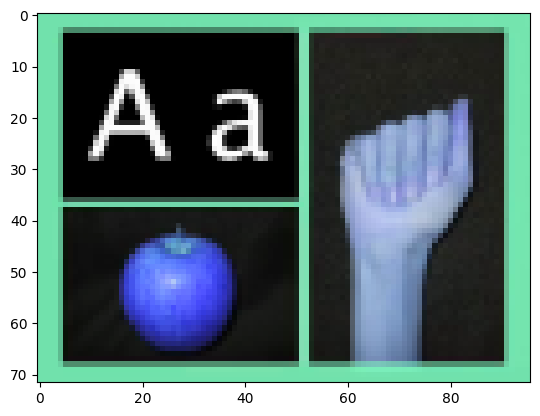

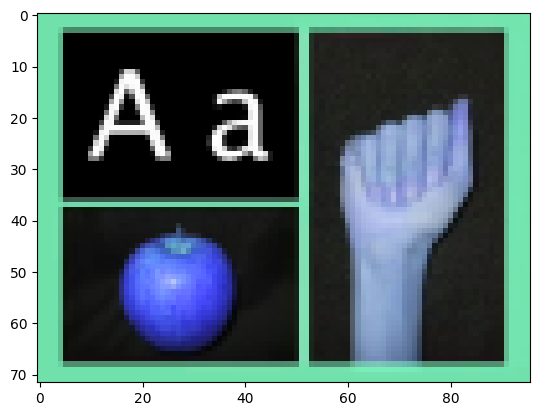

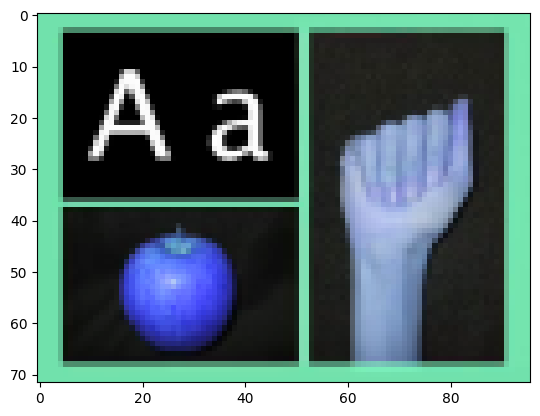

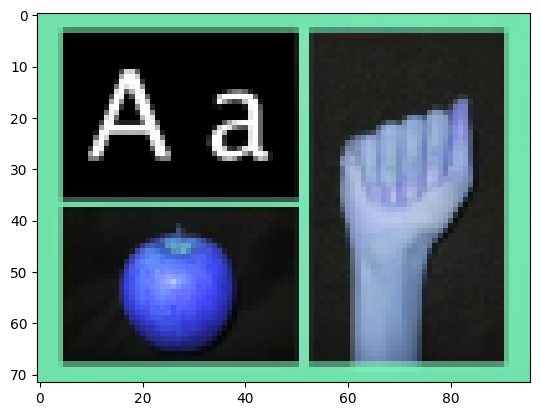

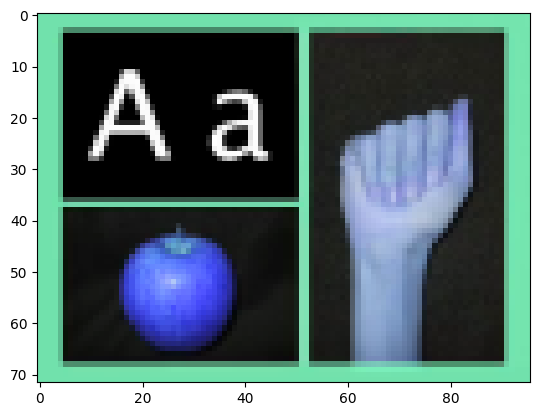

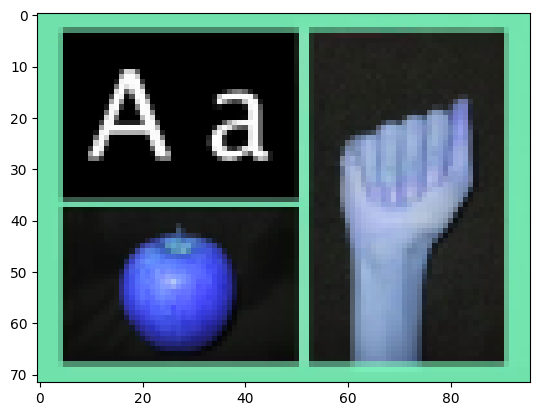

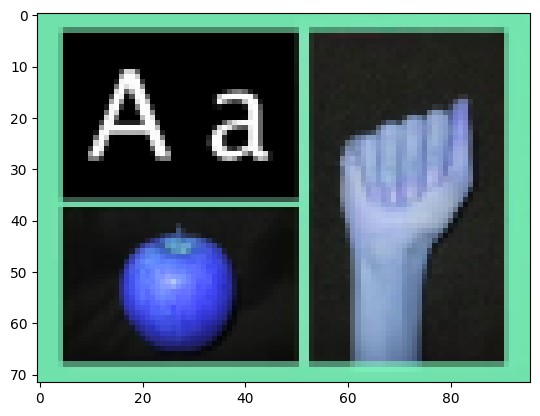

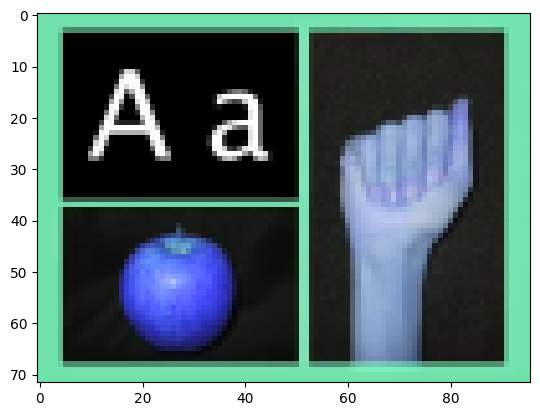

In [25]:
scale_ = 0.2
for i in range(100):
    ret, image = video_stream.read()
    image = cv2.resize(image, None,
                       fx=scale_, fy=scale_,
                       interpolation=cv2.INTER_AREA)
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 1)
        ax.imshow(image)


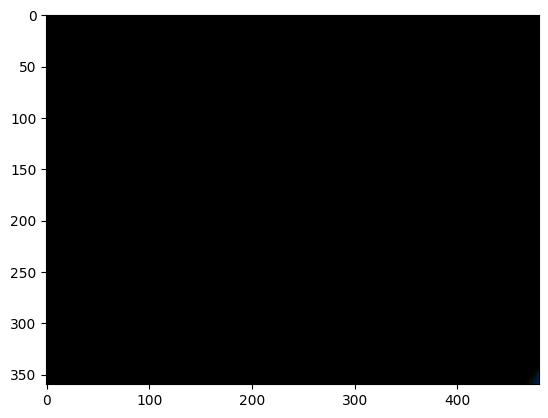

In [21]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [12]:
import numpy as np
hand_pose = np.zeros((21, 3))

In [14]:
hand_pose[0, :] = [10, 20, 10]
hand_pose

array([[10., 20., 10.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [29]:
hand_pose = np.zeros((21, 3))
hand_pose

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
hand_pose_copy = hand_pose.copy()
hand_pose_copy[0, :] = [10, 20, 10]
hand_pose_copy

array([[10., 20., 10.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [33]:
idx = 200
hand_poses = np.hstack([idx, np.hstack(hand_pose)])
hand_poses

array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])